<h3>Введение</h3>

<b>Иерархическое байесовское моделирование</b> (Hierarchical Bayesian Modeling) - это метод статистического моделирования, который позволяет учитывать несколько уровней изменчивости в данных. Он основан на байесовском подходе к статистическому моделированию и используется в различных областях в том числе и медицине.

В иерархическом байесовском моделировании каждый уровень данных моделируется как случайная величина, которая зависит от параметров, которые также являются случайными величинами. Параметры на более высоком уровне в иерархии моделируют распределение параметров на более низком уровне. Таким образом, каждый уровень в иерархии моделирует собственную изменчивость, но также учитывает общую изменчивость на более высоких уровнях.

Основные преимущества иерархического байесовского моделирования заключаются в возможности использования информации из более высоких уровней для улучшения оценок параметров на более низких уровнях и учета различных источников изменчивости данных. Это может быть особенно полезно в случаях, когда данных мало или когда данные имеют сложную структуру.

Примером иерархической байесовской модели может быть модель, используемая в медицине для анализа эффекта лекарств на разных пациентах. В этой модели каждый пациент может иметь свою собственную реакцию на лекарство, но также может быть общая изменчивость между пациентами, которая может быть моделирована на более высоком уровне в иерархии.

Оценка параметров иерархической байесовской модели производится с помощью алгоритма МСМС (Markov Chain Monte Carlo Sampling), который использует байесовский подход и генерирует выборку из апостериорного распределения параметров. Построение модели может быть ресурсоемкой и требует навыков в статистике и программировании.

При моделировании иерархических байесовских моделей, важно правильно определить гиперпараметры, которые описывают априорные распределения для параметров на каждом уровне иерархии. Определение гиперпараметров является критическим шагом в построении модели и может влиять на результаты моделирования.

При оценке параметров иерархической байесовской модели, можно получить интересующие нас характеристики, такие как наиболее вероятное значение параметров, доверительные интервалы, статистики сравнения моделей и т.д.

В Python для моделирования иерархических байесовских моделей широко используются библиотеки, такие как PyMC3, Stan и JAGS. Мы будем использовать PyMC3.

<h3>Относительно нашего исследования</h3>

Иерархическое байесовское моделирование может быть полезным для анализа данных в вашем исследовании. Оно позволит учитывать как индивидуальные, так и групповые различия в параметрах контрастной чувствительности и микротремора глаз в зависимости от уровня тревоги.

Вы можете использовать баллы по тревожности, а не групповой признак, в качестве предикторов в вашей модели. Это позволит более точно учитывать различия в тревожности между индивидуальными испытуемыми и улучшить прогнозы.

В целом, иерархическое байесовское моделирование может помочь вам оценить не только средние значения параметров для каждой группы, но и дисперсии, которые могут различаться между группами и между испытуемыми внутри каждой группы. Также, вы сможете получить более точную оценку на основе меньшего количества данных, что может быть полезно в случае ограниченности выборки.

In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm
import arviz as az

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import pymc3 as pm

In [2]:
df = pd.read_csv("data.csv").drop(columns='id')
df.head()

,Пол,Возраст,Ситуативная_балл,Личностная_балл,Ситуативная_группа,Личностная_группа,0.2,0.4,0.6,0.8,...,ft56,ft67,ft71,ft110,At04,At45,At56,At67,At71,At110
0,Муж,31,24,22,1,1,"8,4","10,6","8,5","18,8",...,"0,041","0,099","0,483","0,352","0,06","0,276","0,348","0,299","0,293","0,294"
1,Муж,31,25,31,1,2,"15,3",9,"23,4","12,5",...,"0,061","0,14","0,421","0,346","0,0562","0,18","0,195","0,196","0,201","0,2"
2,Муж,39,25,38,1,2,"11,2","15,9","12,7","9,8",...,"0,049","0,091","0,453","0,376","0,2647","0,35","0,203","0,439","0,338","0,33"
3,Жен,47,27,41,1,2,"6,7","8,8",23,25,...,"0,047","0,14","0,42","0,352","0,2158","0,235","0,31","0,251","0,284","0,291"
4,Муж,47,32,25,2,1,"8,3","14,9","19,1",19,...,"0,064","0,118","0,401","0,391","0,1438","0,16","0,246","0,257","0,253","0,255"


In [3]:
df.iloc[:,:-2].to_csv('clean.csv')

Убедимся в целосности данных 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Пол                 40 non-null     object
 1   Возраст             40 non-null     int64 
 2   Ситуативная_балл    40 non-null     int64 
 3   Личностная_балл     40 non-null     int64 
 4   Ситуативная_группа  40 non-null     int64 
 5   Личностная_группа   40 non-null     int64 
 6   0.2                 40 non-null     object
 7   0.4                 40 non-null     object
 8   0.6                 40 non-null     object
 9   0.8                 40 non-null     object
 10  1.0                 40 non-null     object
 11  3.0                 40 non-null     object
 12  6.0                 40 non-null     object
 13  8.0                 40 non-null     object
 14  10.0                40 non-null     object
 15  mof                 40 non-null     object
 16  moA                 40 non-n

переведем колонки с частотой и амплитудой из строкового формата в числовой, чтоб можно было делать расчеты

In [5]:
# преобразование категориальных переменных в числа
df['Пол'] = (df['Пол'] == 'Муж').astype(int)
df['Ситуативная_группа'] = df['Ситуативная_группа'].astype(int)
df['Личностная_группа'] = df['Личностная_группа'].astype(int)

# Замена запятых на точки и преобразование строковых значений в числа
df["0.2"] = df["0.2"].str.replace(",", ".").astype(float)
df["0.4"] = df["0.4"].str.replace(",", ".").astype(float)
df["0.6"] = df["0.6"].str.replace(",", ".").astype(float)
df["0.8"] = df["0.8"].str.replace(",", ".").astype(float)
df["1.0"] = df["1.0"].str.replace(",", ".").astype(float)
df["3.0"] = df["3.0"].str.replace(",", ".").astype(float)
df["6.0"] = df["6.0"].str.replace(",", ".").astype(float)
df["8.0"] = df["8.0"].str.replace(",", ".").astype(float)
df["10.0"] = df["10.0"].str.replace(",", ".").astype(float)
df["mof"] = df["mof"].str.replace(",", ".").astype(float)
df["moA"] = df["moA"].str.replace(",", ".").astype(float)
df["ft04"] = df["ft04"].str.replace(",", ".").astype(float)
df["ft45"] = df["ft45"].str.replace(",", ".").astype(float)
df["ft56"] = df["ft56"].str.replace(",", ".").astype(float)
df["ft67"] = df["ft67"].str.replace(",", ".").astype(float)
df["ft71"] = df["ft71"].str.replace(",", ".").astype(float)
df["ft110"] = df["ft110"].str.replace(",", ".").astype(float)
df["At04"] = df["At04"].str.replace(",", ".").astype(float)
df["At45"] = df["At45"].str.replace(",", ".").astype(float)
df["At56"] = df["At56"].str.replace(",", ".").astype(float)
df["At67"] = df["At67"].str.replace(",", ".").astype(float)
df["At71"] = df["At71"].str.replace(",", ".").astype(float)
df["At110"] = df["At110"].str.replace(",", ".").astype(float)

Выведим для них описательную статистику

In [6]:
df.describe()

,Пол,Возраст,Ситуативная_балл,Личностная_балл,Ситуативная_группа,Личностная_группа,0.2,0.4,0.6,0.8,...,ft56,ft67,ft71,ft110,At04,At45,At56,At67,At71,At110
count,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.475000,28.65000,44.250000,46.050000,2.375000,2.500000,9.660000,13.282500,16.272500,17.705000,...,0.052995,0.119605,0.434020,0.363110,0.121952,0.249908,0.274350,0.263857,0.269508,0.266113
std,0.505736,10.01934,12.005875,11.775572,0.667467,0.599145,4.143688,3.931783,6.503056,6.991421,...,0.006725,0.013550,0.019358,0.013357,0.120946,0.065421,0.063667,0.047422,0.053564,0.047015
min,0.000000,19.00000,24.000000,22.000000,1.000000,1.000000,1.200000,5.200000,5.500000,6.100000,...,0.040000,0.091000,0.401000,0.327300,0.000000,0.114000,0.104000,0.181800,0.179000,0.175000
25%,0.000000,20.75000,37.750000,39.750000,2.000000,2.000000,6.700000,10.450000,12.125000,12.575000,...,0.047825,0.111850,0.420750,0.352875,0.059550,0.195450,0.241275,0.230375,0.231375,0.227775
50%,0.000000,23.00000,43.500000,45.500000,2.000000,3.000000,9.700000,13.150000,15.950000,18.950000,...,0.052300,0.118500,0.428500,0.364500,0.093850,0.257750,0.266000,0.263000,0.264700,0.260400
75%,1.000000,34.50000,51.000000,51.000000,3.000000,3.000000,11.400000,16.125000,19.900000,22.950000,...,0.058825,0.128500,0.449250,0.373100,0.143500,0.292300,0.309250,0.286325,0.296750,0.296250
max,1.000000,49.00000,79.000000,75.000000,3.000000,3.000000,23.100000,20.300000,31.700000,29.700000,...,0.065000,0.150000,0.483000,0.391000,0.739600,0.396000,0.449000,0.439000,0.448000,0.372000


Так как наши предикторы Микротреммор глаз (частота (обозначается ft) и (амплитуда At)) и Контрастная чувствительность измеренны для разных диапазоннах и интервалах соответсвенно, попробуем с помощью метода PCA собрать их в главные компоненты. 

Чтобы выполнить анализ основных компонентов для наших трех групп предикторов (амплитуда, частота, чувствительность), выполним следующие шаги:

1) Стандартизируем данные: перед применением PCA важно масштабировать признаки так, чтобы каждый признак имел среднее значение 0 и стандартное отклонение 1. Это важно, потому что PCA чувствителен к масштабам входных признаков.

2) Выполните PCA отдельно для каждой группы: Поскольку мы хотим выполнить PCA для каждой группы объектов по отдельности, примените алгоритм PCA к каждой группе, а затем выберите количество основных компонентов (ПК), которые мы хотим сохранить.

3) Определим количество компонентов: один из способов выбрать количество компьютеров — использовать критерий «объясненной дисперсии». Посмотрим на график кумулятивной объясненной дисперсии и выберем количество ПК, при котором кривая начинает выходить на плато или когда она достигает определенного порога (например, 95% от общей дисперсии).
    

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data_group1 = df[['mof', 'ft04', 'ft45', 'ft56', 'ft67', 'ft71', 'ft110']]

data_group2 = df[['moA', 'At04', 'At45', 'At56', 'At67', 'At71', 'At110']]

data_group3 = df[['0.2', '0.4', '0.6', '0.8', '1.0', '3.0', '6.0', '8.0', '10.0']]

# Standardize the data
scaler = StandardScaler()
data_group1_scaled = scaler.fit_transform(data_group1)
data_group2_scaled = scaler.fit_transform(data_group2)
data_group3_scaled = scaler.fit_transform(data_group3)

# Perform PCA on each group
pca_group1 = PCA()
pca_group2 = PCA()
pca_group3 = PCA()

pca_group1.fit(data_group1_scaled)
pca_group2.fit(data_group2_scaled)
pca_group3.fit(data_group3_scaled)

PCA()

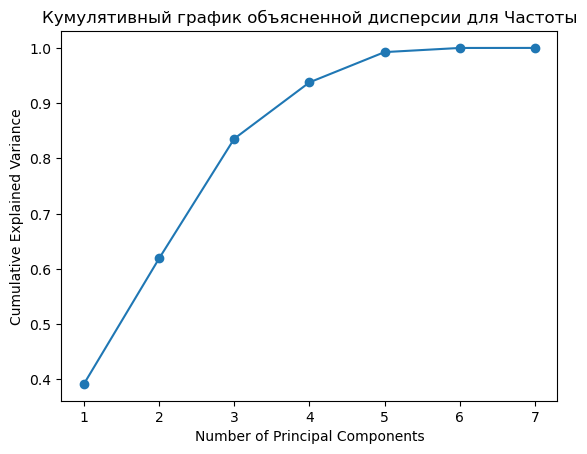

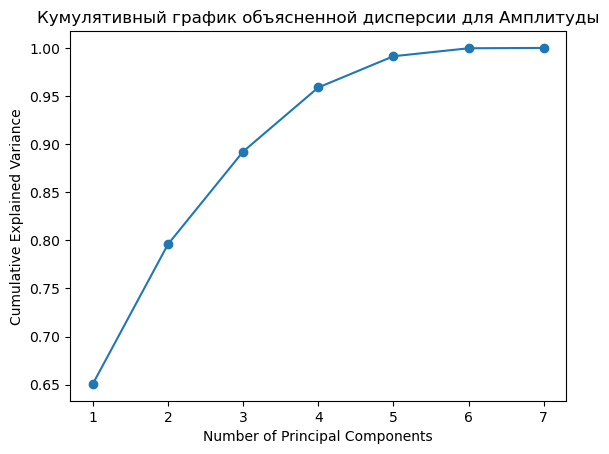

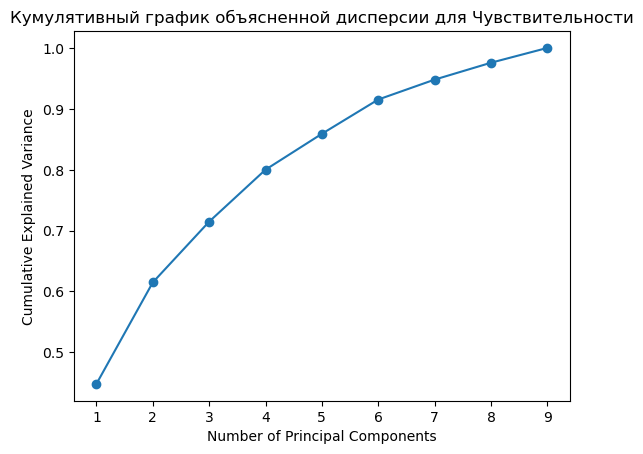

In [14]:
def plot_pca_results(pca, group_name):
    plt.figure()
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title(f'Кумулятивный график объясненной дисперсии для {group_name}')
    plt.show()

# Plot PCA results for each group
plot_pca_results(pca_group1, 'Частоты')
plot_pca_results(pca_group2, 'Амплитуды')
plot_pca_results(pca_group3, 'Чувствительности')


На графиках можем понять сколько нам нужно компонент чтоб не терять много информации.
Возьмем:
- 4 компонента для частоты 
- 4 компонента для амплитуды
- 7 компонент для чувствительности

In [15]:
n_components_group1 = 4
n_components_group2 = 4
n_components_group3 = 7

# Transform the data
data_group1_transformed = pca_group1.transform(data_group1_scaled)[:, :n_components_group1]
data_group2_transformed = pca_group2.transform(data_group2_scaled)[:, :n_components_group2]
data_group3_transformed = pca_group3.transform(data_group3_scaled)[:, :n_components_group3]

# Concatenate the reduced feature sets
reduced_features = np.hstack((data_group1_transformed, data_group2_transformed, data_group3_transformed))

In [20]:
import pandas as pd

# Convert the reduced features to a Pandas DataFrame
reduced_features_df = pd.DataFrame(data_group1_transformed, columns=[f'ft_{i + 1}' for i in range(n_components_group1)])

for i in range(n_components_group2):
    reduced_features_df[f'At_{i + 1}'] = data_group2_transformed[:, i]

for i in range(n_components_group3):
    reduced_features_df[f'sens_{i + 1}'] = data_group3_transformed[:, i]


In [27]:
reduced_features_df.columns

Index(['ft_1', 'ft_2', 'ft_3', 'ft_4', 'At_1', 'At_2', 'At_3', 'At_4',
       'sens_1', 'sens_2', 'sens_3', 'sens_4', 'sens_5', 'sens_6', 'sens_7'],
      dtype='object')

In [22]:
df.reset_index(drop=True, inplace=True)

# Concatenate the reduced features to the initial dataset
extended_data = pd.concat([df, reduced_features_df], axis=1)

По итогу будем использовать для ислледования только 4 компонента для частоты (ft_1 - ft_4),
4 компонента для амплитуды (At_1 - At_4) и 7 компонент для чувствительности (sens_1 - sens_7)

In [77]:
# Удалим выбросы
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data_filtered

# Remove outliers for situational_anxiety and personal_anxiety columns
extended_data_filtered = remove_outliers_iqr(extended_data, 'Ситуативная_балл')
extended_data_filtered = remove_outliers_iqr(extended_data_filtered, 'Личностная_балл')


In [78]:
extended_data_filtered.shape

(36, 44)

In [103]:
# Standardize the data
scaler = StandardScaler()
extended_data_filtered[['ft_1', 'ft_2', 'ft_3', 'ft_4']] = scaler.fit_transform(extended_data_filtered[['ft_1', 'ft_2', 'ft_3', 'ft_4']])
extended_data_filtered[['At_1', 'At_2', 'At_3', 'At_4']] = scaler.fit_transform(extended_data_filtered[['At_1', 'At_2', 'At_3', 'At_4']])
extended_data_filtered[['sens_1', 'sens_2', 'sens_3', 'sens_4', 'sens_5', 'sens_6', 'sens_7']] = scaler.fit_transform(extended_data_filtered[['sens_1', 'sens_2', 'sens_3', 'sens_4', 'sens_5', 'sens_6', 'sens_7']])

<h2> Построение иерархической байесовской модели

В этой функции мы определяем все параметры модели, 
в том числе гиперпараметры и интерсепты для каждой группы. 
Мы также определяем априорные распределения для предикторов, 
модельную ошибку и логарифмическую функцию правдоподобия. 
После этого мы проводим сэмплирование модели, используя функцию pm.sample(), 
которая возвращает объект trace.

In [107]:
import pandas as pd
import numpy as np
import pymc3 as pm
import theano.tensor as tt
import arviz as az


# Извлечение данных
predictors = ['ft_1', 'ft_2', 'ft_3', 'ft_4', 'At_1', 'At_2', 'At_3', 'At_4',
              'sens_1', 'sens_2', 'sens_3', 'sens_4', 'sens_5', 'sens_6', 'sens_7']
X_contrast = extended_data_filtered[['sens_1', 'sens_2', 'sens_3', 'sens_4', 'sens_5', 'sens_6', 'sens_7']].values
X_tremor = extended_data_filtered[['ft_1', 'ft_2', 'ft_3', 'ft_4', 'At_1', 'At_2', 'At_3', 'At_4',]].values
situational_anxiety = extended_data_filtered['Ситуативная_балл'].values
personal_anxiety = extended_data_filtered['Личностная_балл'].values

# Подготовка данных для анализа
n_subjects = len(extended_data_filtered)

def standardize(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

X_contrast_standardized = standardize(X_contrast)
X_tremor_standardized = standardize(X_tremor)

with pm.Model() as robust_hierarchical_model:
    # Hyperparameters
    mu_contrast = pm.Normal('mu_contrast', mu=0, sd=10, shape=7)
    sigma_contrast = pm.HalfNormal('sigma_contrast', sd=10, shape=7)

    mu_tremor = pm.Normal('mu_tremor', mu=0, sd=10, shape=8)
    sigma_tremor = pm.HalfNormal('sigma_tremor', sd=10, shape=8)

    # Non-central parameterization
    contrast_offset = pm.Normal('contrast_offset', mu=0, sd=1, shape=(n_subjects, 7))
    tremor_offset = pm.Normal('tremor_offset', mu=0, sd=1, shape=(n_subjects, 8))

    contrast = pm.Deterministic('contrast', mu_contrast + sigma_contrast * contrast_offset)
    tremor = pm.Deterministic('tremor', mu_tremor + sigma_tremor * tremor_offset)

    # Relationship between parameters and anxiety
    situational_coef = pm.Normal('situational_coef', mu=0, sd=1, shape=15)
    personal_coef = pm.Normal('personal_coef', mu=0, sd=1, shape=15)

    # Linear model
    mu_situational = tt.dot(np.hstack((X_contrast_standardized, X_tremor_standardized)), situational_coef)
    mu_personal = tt.dot(np.hstack((X_contrast_standardized, X_tremor_standardized)), personal_coef)

    # Observations
    obs_situational = pm.StudentT('obs_situational', mu=mu_situational, sd=1, nu=3, observed=situational_anxiety)
    obs_personal = pm.StudentT('obs_personal', mu=mu_personal, sd=1, nu=3, observed=personal_anxiety)

    # Run MCMC algorithm to obtain the posterior distribution
    trace_robust_hierarchical = pm.sample(5000, tune=3000, target_accept=0.99, return_inferencedata=True)

summary = az.summary(trace_robust_hierarchical)
summary


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [personal_coef, situational_coef, tremor_offset, contrast_offset, sigma_tremor, mu_tremor, sigma_contrast, mu_contrast]


Sampling 4 chains for 3_000 tune and 5_000 draw iterations (12_000 + 20_000 draws total) took 51 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_contrast[0],-0.040,9.912,-18.319,18.666,0.043,0.084,53240.0,13533.0,1.0
mu_contrast[1],0.061,9.980,-18.563,18.808,0.044,0.084,50765.0,13555.0,1.0
mu_contrast[2],-0.030,9.917,-18.694,18.841,0.043,0.088,53429.0,13561.0,1.0
mu_contrast[3],0.031,10.050,-18.539,19.444,0.043,0.091,53785.0,12435.0,1.0
mu_contrast[4],0.000,9.919,-18.042,19.427,0.044,0.088,51948.0,12789.0,1.0
...,...,...,...,...,...,...,...,...,...
"tremor[35, 3]",0.031,13.982,-26.725,25.943,0.075,0.093,37068.0,15439.0,1.0
"tremor[35, 4]",0.047,14.076,-26.138,26.960,0.076,0.094,35987.0,15540.0,1.0
"tremor[35, 5]",0.030,14.046,-27.070,25.742,0.079,0.094,33987.0,15889.0,1.0
"tremor[35, 6]",0.046,14.246,-26.428,27.828,0.081,0.098,33013.0,14260.0,1.0


Проанализируем сошлась ли модель

R-hat (статистика Гельмана-Рубина): эта статистика измеряет отношение дисперсии между цепочками к дисперсии внутри цепочки. Другими словами, он сравнивает изменчивость между разными цепочками с изменчивостью внутри одной цепочки. В идеале значения R-шляпы должны быть близки к 1. Значения, значительно превышающие 1 (например, > 1,1), указывают на то, что цепи еще не сошлись. В сводной таблице отображаются значения R-hat для каждого параметра вашей модели.

Эффективный размер выборки (ESS): эта диагностика измеряет количество эффективно независимых выборок в цепочках MCMC. Он учитывает автокорреляцию внутри каждой цепочки, что может уменьшить эффективное количество независимых выборок. В идеале ESS должен быть не менее 200 для всех параметров, что указывает на наличие достаточного количества эффективно независимых выборок для каждого параметра. В сводной таблице будут отображаться значения ESS для каждого параметра вашей модели.

Так как значения R-hat близки к 1, а значения ESS больше 200 для всех параметров, мы можем считать, что наша модель сошлась.

Функция az.plot_trace(trace) ниже создает графики, которые визуализируют результаты MCMC (Markov Chain Monte Carlo) семплирования. Графики состоят из двух частей для каждого параметра: левая часть — это график плотности апостериорного распределения параметра, а правая часть — это график трассировки (trace plot), который показывает значения параметра на каждом шаге MCMC.

    График плотности (левая часть): Это график апостериорного распределения параметра после MCMC семплирования. Форма графика показывает, насколько параметр определен. Если распределение узкое и скошенное, это указывает на то, что параметр хорошо определен. Если распределение широкое и плоское, это может указывать на неопределенность или мультиколлинеарность данных.

    Trace plot (правая часть): График трассировки показывает значения параметра на каждом шаге MCMC. Он используется для оценки сходимости алгоритма. Если график трассировки представляет собой хорошо перемешанный и стационарный процесс (то есть без очевидных трендов, скачков или периодичности), это указывает на хорошую сходимость алгоритма. Если же график имеет вид плохо перемешанных или стационарных процессов, это может указывать на проблемы с сходимостью

array([[<Axes: title={'center': 'mu_contrast'}>,
        <Axes: title={'center': 'mu_contrast'}>],
       [<Axes: title={'center': 'mu_tremor'}>,
        <Axes: title={'center': 'mu_tremor'}>],
       [<Axes: title={'center': 'contrast_offset'}>,
        <Axes: title={'center': 'contrast_offset'}>],
       [<Axes: title={'center': 'tremor_offset'}>,
        <Axes: title={'center': 'tremor_offset'}>],
       [<Axes: title={'center': 'situational_coef'}>,
        <Axes: title={'center': 'situational_coef'}>],
       [<Axes: title={'center': 'personal_coef'}>,
        <Axes: title={'center': 'personal_coef'}>],
       [<Axes: title={'center': 'sigma_contrast'}>,
        <Axes: title={'center': 'sigma_contrast'}>],
       [<Axes: title={'center': 'sigma_tremor'}>,
        <Axes: title={'center': 'sigma_tremor'}>],
       [<Axes: title={'center': 'contrast'}>,
        <Axes: title={'center': 'contrast'}>],
       [<Axes: title={'center': 'tremor'}>,
        <Axes: title={'center': 'tremor'}

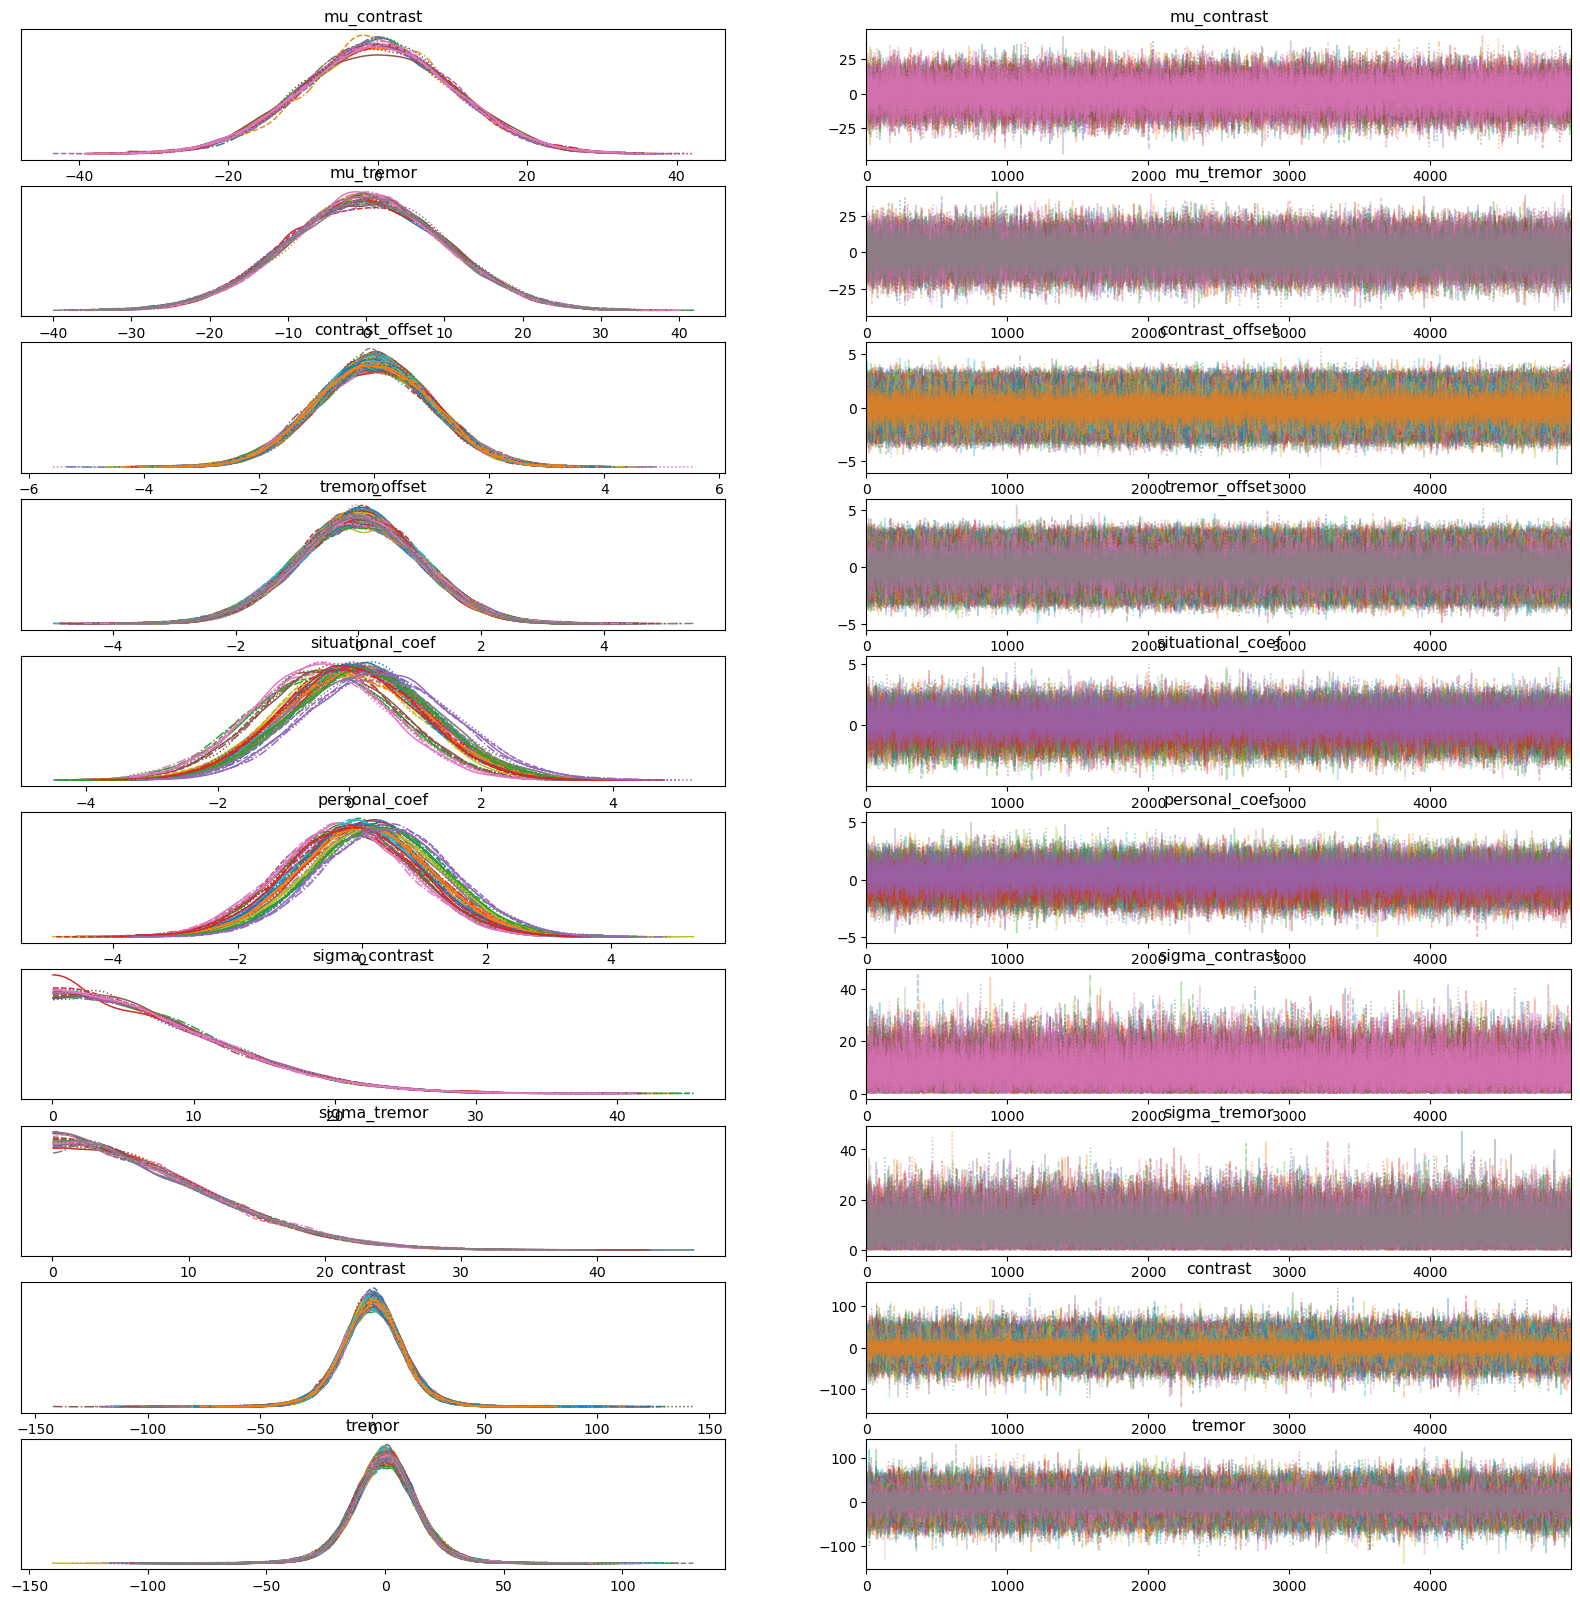

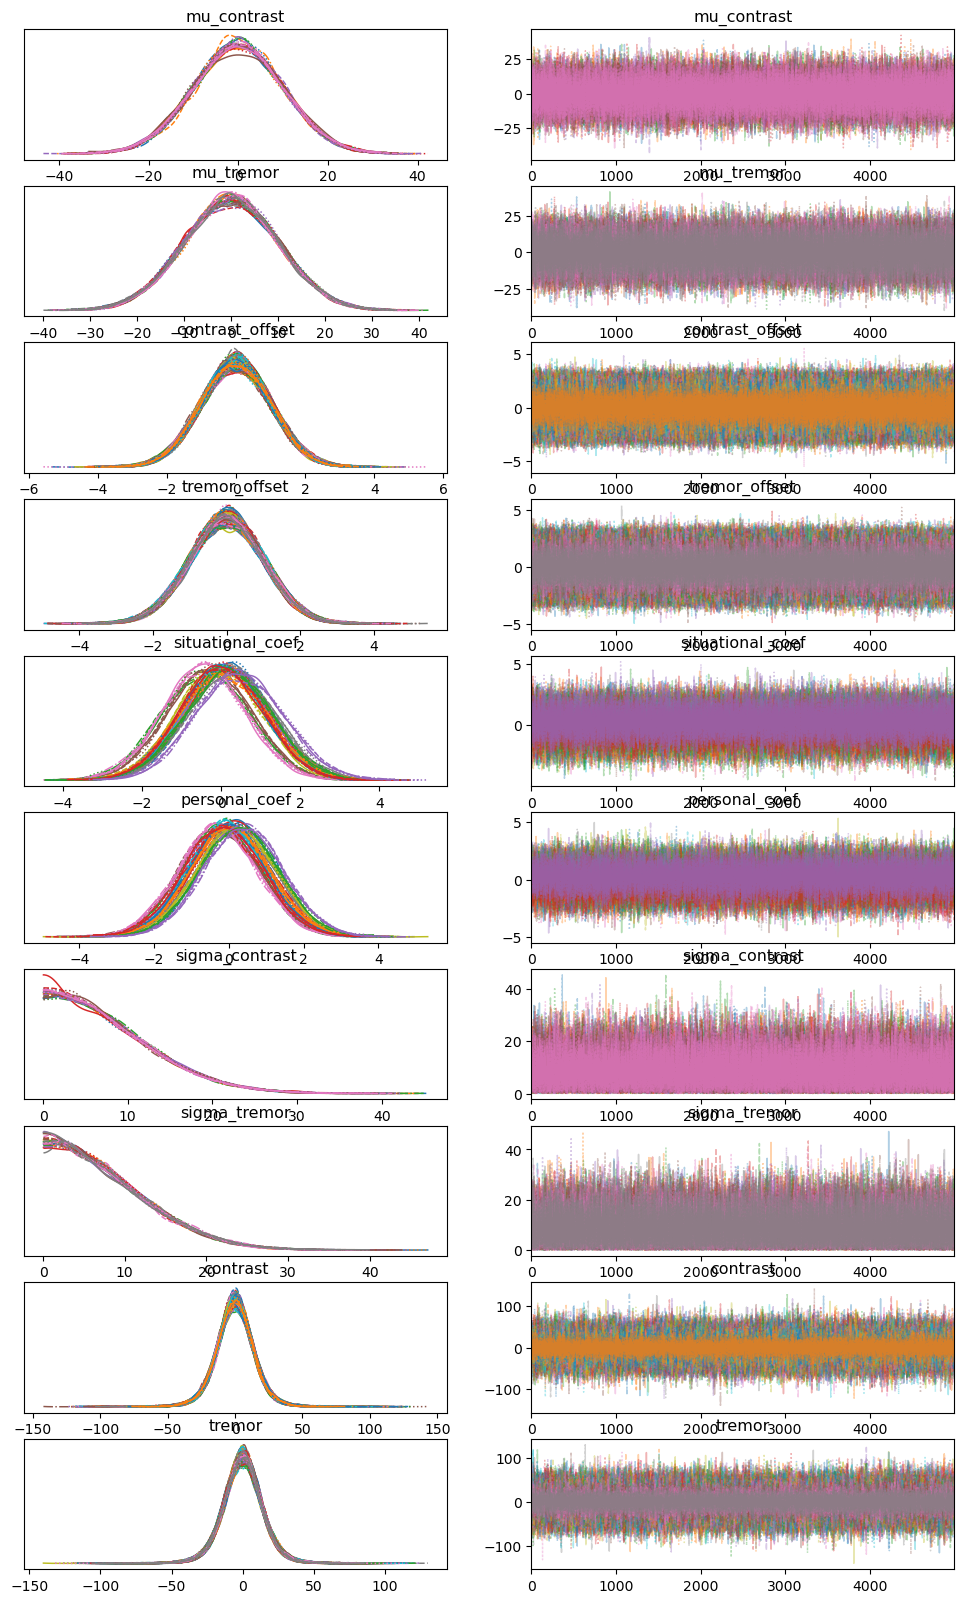

In [108]:
# Анализ результатов
import arviz as az

az.plot_trace(trace_robust_hierarchical, figsize=(20, 20))

# Проверка сходимости модели
az.plot_trace(trace_robust_hierarchical)

<h5>Проанализируем графики</h5>

Анализируя графики, обратитим внимание на:
   
   <b>Сходимость алгоритма</b>: График трассировки выглядит как хорошо перемешанный и стационарный процесс, это указывает на успешную сходимость алгоритма. Значит количество итераци и параметры семплирования выбраны правильно.

## Построение базовой модели

В данной модели не будет иерархической структуры, будем использовать только чувствительность. Данная модель будет служить бэйзлайном чтоб потом сравнивать результаты с более комплексной

In [116]:
# Базовая модель с чувствительностью вместо тремора
with pm.Model() as robust_base_model:
    # Priors for contrast variables
    mu_contrast = pm.Normal('mu_contrast', mu=0, sd=10, shape=7)
    sigma_contrast = pm.HalfNormal('sigma_contrast', sd=10, shape=7)

    # Non-central parameterization
    contrast_offset = pm.Normal('contrast_offset', mu=0, sd=1, shape=(n_subjects, 7))
    contrast = pm.Deterministic('contrast', mu_contrast + sigma_contrast * contrast_offset)

    # Relationship between parameters and anxiety
    situational_coef = pm.Normal('situational_coef', mu=0, sd=1, shape=7)
    personal_coef = pm.Normal('personal_coef', mu=0, sd=1, shape=7)

    # Linear model
    mu_situational = tt.dot(X_contrast_standardized, situational_coef)
    mu_personal = tt.dot(X_contrast_standardized, personal_coef)

    # Observations
    obs_situational = pm.StudentT('obs_situational', mu=mu_situational, sd=1, nu=3, observed=situational_anxiety)
    obs_personal = pm.StudentT('obs_personal', mu=mu_personal, sd=1, nu=3, observed=personal_anxiety)

    # Run MCMC algorithm to obtain the posterior distribution
    trace_robust_base = pm.sample(5000, tune=3000, target_accept=0.99, return_inferencedata=True)

summary = az.summary(trace_robust_base)
summary


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [personal_coef, situational_coef, contrast_offset, sigma_contrast, mu_contrast]


Sampling 4 chains for 3_000 tune and 5_000 draw iterations (12_000 + 20_000 draws total) took 36 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_contrast[0],-0.046,10.067,-19.048,18.748,0.058,0.079,29781.0,13904.0,1.0
mu_contrast[1],-0.015,9.991,-19.119,18.504,0.061,0.077,26733.0,14198.0,1.0
mu_contrast[2],0.041,9.952,-18.005,19.689,0.057,0.080,30568.0,14034.0,1.0
mu_contrast[3],-0.027,10.035,-18.621,18.967,0.055,0.079,33642.0,14653.0,1.0
mu_contrast[4],-0.035,10.111,-18.872,18.919,0.062,0.077,26323.0,14531.0,1.0
...,...,...,...,...,...,...,...,...,...
"contrast[35, 2]",-0.015,14.006,-25.927,26.691,0.088,0.089,25823.0,16736.0,1.0
"contrast[35, 3]",-0.038,14.282,-26.524,27.385,0.088,0.087,27027.0,16511.0,1.0
"contrast[35, 4]",-0.008,14.039,-26.953,26.041,0.091,0.089,24061.0,15896.0,1.0
"contrast[35, 5]",-0.097,14.186,-25.379,28.430,0.092,0.090,24249.0,16098.0,1.0


In [117]:
# Compare models using LOO
loo_robust_hierarchical_situational = az.loo(trace_robust_hierarchical, var_name="obs_situational", pointwise=True, scale="deviance")
loo_robust_hierarchical_personal = az.loo(trace_robust_hierarchical, var_name="obs_personal", pointwise=True, scale="deviance")
loo_robust_base_situational = az.loo(trace_robust_base, var_name="obs_situational", pointwise=True, scale="deviance")
loo_robust_base_personal = az.loo(trace_robust_base, var_name="obs_personal", pointwise=True, scale="deviance")

# Compute the difference in LOO values
loo_diff_situational = loo_robust_hierarchical_situational.loo - loo_robust_base_situational.loo
loo_diff_personal = loo_robust_hierarchical_personal.loo - loo_robust_base_personal.loo

# Print the results
print("Hierarchical Model LOO (Situational):", loo_robust_hierarchical_situational.loo)
print("Base Model LOO (Situational):", loo_robust_base_situational.loo)
print("Difference in LOO (Situational):", loo_diff_situational)

print("Hierarchical Model LOO (Personal):", loo_robust_hierarchical_personal.loo)
print("Base Model LOO (Personal):", loo_robust_base_personal.loo)
print("Difference in LOO (Personal):", loo_diff_personal)

# Model comparison using LOO-CV
loo_robust_hierarchical_situational = az.loo(trace_robust_hierarchical, var_name="obs_situational", pointwise=True, scale="deviance")


Hierarchical Model LOO (Situational): 993.3349495521535
Base Model LOO (Situational): 990.907341731252
Difference in LOO (Situational): 2.4276078209014713
Hierarchical Model LOO (Personal): 1005.3904699308696
Base Model LOO (Personal): 1003.505258961507
Difference in LOO (Personal): 1.8852109693625607


Значения LOO можно интерпретировать как аппроксимацию ошибки прогнозирования вне выборки, при этом меньшие значения указывают на лучшее соответствие модели. Другими словами, более низкое значение LOO означает, что модель лучше предсказывает новые, невидимые данные.

Вот разбивка результатов:

     Ситуационная тревога:

     иерархическая модель LOO: 993.33
     базовая модель LOO: 990.9
     Разница в LOO: 2.43

Базовая модель имеет меньшее значение LOO для ситуационной тревожности, что указывает на то, что она лучше подходит для прогнозирования ситуационной тревожности по сравнению с устойчивой иерархической моделью.

     Личная тревога:

     иерархическая модель LOO: 1005.39
     базовая модель LOO: 1003.5
     Разница в LOO: 1.88

Опять же, базовая модель имеет меньшее значение LOO для личной тревожности, что указывает на то, что она лучше подходит для прогнозирования личной тревожности по сравнению с устойчивой иерархической моделью.

Таким образом, исходя из значений LOO, базовая модель лучше объясняет как ситуационную, так и личную тревогу по сравнению с надежной иерархической моделью. Разница в значениях LOO дает нам представление о величине улучшения: 2.43 для ситуативной тревожности и 1.88 для личной тревожности.

<h5> Посмотрим на численные значения </h5>

In [118]:
situational_coef_summary = az.summary(trace_robust_base, var_names=['situational_coef'])
situational_coef_summary.iloc[:, :4]

,mean,sd,hdi_3%,hdi_97%
situational_coef[0],0.219,1.055,-1.810,2.120
situational_coef[1],0.152,1.047,-1.797,2.140
situational_coef[2],-0.391,1.059,-2.404,1.614
situational_coef[3],0.070,1.049,-1.888,2.068
situational_coef[4],0.115,1.047,-1.855,2.083
situational_coef[5],-0.249,1.053,-2.226,1.733
situational_coef[6],-0.421,1.060,-2.390,1.604


In [119]:
personal_coef_summary = az.summary(trace_robust_base, var_names=['personal_coef'])
personal_coef_summary.iloc[:, :4]

,mean,sd,hdi_3%,hdi_97%
personal_coef[0],0.226,1.027,-1.719,2.120
personal_coef[1],0.023,1.038,-1.896,1.954
personal_coef[2],-0.238,1.039,-2.273,1.622
personal_coef[3],0.054,1.050,-1.920,2.012
personal_coef[4],-0.058,1.047,-2.068,1.873
personal_coef[5],-0.214,1.051,-2.239,1.677
personal_coef[6],-0.297,1.044,-2.265,1.673


<h5> Интерпретация результатов </h5>

Чем коэффициенты в situational_coef и personal_coef сильнее отличаются от нуля,
тем сильнее связи между параметрами и тревогой.

Для определения значимости различий в situational_coef_summary, обратим внимание на следующие значения:

    mean: среднее значение коэффициента, которое оценивает величину связи между параметрами и ситуативной тревогой. Если среднее значение близко к нулю, это указывает на отсутствие значимой связи.

    hdi_3% и hdi_97%: нижняя и верхняя границы 95% доверительного интервала для коэффициента. Если доверительный интервал не содержит нуля, это указывает на значимость коэффициента на уровне 0.05.

Для анализа результатов, проверим средние значения коэффициентов и их доверительные интервалы. Если среднее значение коэффициента значительно отличается от нуля и 95% доверительный интервал не содержит нуля, это указывает на статистически значимую связь между параметрами и ситуативной тревогой. Если же доверительный интервал содержит ноль, то различия между параметрами и ситуативной тревогой могут быть случайными.

Тот же анализ применим и для личностной тревоги (personal_coef_summary).

In [120]:
# Вывод результатов
print("Ситуативная тревога:")
for i, coef in enumerate(situational_coef_summary['mean']):
    print(f"Коэффициент {i}: {coef:.3f} (95% доверительный интервал: {situational_coef_summary['hdi_3%'][i]:.3f}, {situational_coef_summary['hdi_97%'][i]:.3f})")

Ситуативная тревога:
Коэффициент 0: 0.219 (95% доверительный интервал: -1.810, 2.120)
Коэффициент 1: 0.152 (95% доверительный интервал: -1.797, 2.140)
Коэффициент 2: -0.391 (95% доверительный интервал: -2.404, 1.614)
Коэффициент 3: 0.070 (95% доверительный интервал: -1.888, 2.068)
Коэффициент 4: 0.115 (95% доверительный интервал: -1.855, 2.083)
Коэффициент 5: -0.249 (95% доверительный интервал: -2.226, 1.733)
Коэффициент 6: -0.421 (95% доверительный интервал: -2.390, 1.604)


In [121]:
print("\nЛичностная тревога:")
for i, coef in enumerate(personal_coef_summary['mean']):
    print(f"Коэффициент {i}: {coef:.3f} (95% доверительный интервал: {personal_coef_summary['hdi_3%'][i]:.3f}, {personal_coef_summary['hdi_97%'][i]:.3f})")


Личностная тревога:
Коэффициент 0: 0.226 (95% доверительный интервал: -1.719, 2.120)
Коэффициент 1: 0.023 (95% доверительный интервал: -1.896, 1.954)
Коэффициент 2: -0.238 (95% доверительный интервал: -2.273, 1.622)
Коэффициент 3: 0.054 (95% доверительный интервал: -1.920, 2.012)
Коэффициент 4: -0.058 (95% доверительный интервал: -2.068, 1.873)
Коэффициент 5: -0.214 (95% доверительный интервал: -2.239, 1.677)
Коэффициент 6: -0.297 (95% доверительный интервал: -2.265, 1.673)


Как уже было указано выше, чтобы принять решение о статистически значимой связи предиктора с целевой переменной (тревожностью), нам нужно обратить внимание на средние значения коэффициентов и их 95% доверительные интервалы.

Если среднее значение коэффициента значительно отличается от нуля и 95% доверительный интервал не содержит нуля, это указывает на статистически значимую связь между предиктором и тревожностью. Если же доверительный интервал содержит ноль, то различия между предиктором и тревожностью могут быть случайными.

In [122]:
# Соберем в списки значимые и незначимые предикторы для личной и ситуативной тревоги
not_significant_situational = []
significant_situational = []

not_significant_personal = []
significant_personal = []

for i, coef in enumerate(situational_coef_summary['mean']):
    if situational_coef_summary['hdi_3%'][i] > 0 or situational_coef_summary['hdi_97%'][i] < 0:
        significant_situational.append(i)
    else:
        not_significant_situational.append(i)
        
for i, coef in enumerate(personal_coef_summary['mean']):
    if personal_coef_summary['hdi_3%'][i] > 0 or personal_coef_summary['hdi_97%'][i] < 0:
        significant_personal.append(i)
    else:
        not_significant_personal.append(i)

In [124]:
significant_situational

[]

In [125]:
significant_personal

[]

<h3> Заключение </h3>

Для того чтоб выявить связь между
- амплитудой микротремора глаз (на разных интервалах)
- частотой микротремора глаз (на разных диапазонах)
- контрастная чувствительностью (на 9 пространственных частотах)

и целевыми значениями:
- ситуативная тревожность 
- личностная тревожность

был проведенно иерархическое байесовское моделирование.

По <b>результатам</b> исследования не было выявленно статистически значимой связи между предикторами и <b>ситуативной тревожностью</b> и <b>личностной тревожностью</b>